##***RUSL ETF Prediction with LSTM and ARIMA model***

###Group 18<br>
Abheeshek Gupta (UID:3035601621)<br>
Hsu, Ya Cheng (UID:3035550250)<br>




Installation of Necessary Libraries

In [0]:
#!pip3 install tensorflow==2.0.0

Introductory header files




In [0]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import numpy as np
import io
import matplotlib.pyplot as plt
import os
from subprocess import check_output as co
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
import tensorflow_datasets as tfds
# Check if any GPU is detected
print("Is GPU available: ", tf.test.is_gpu_available())
print("GPU(s) found: ")
print(tf.config.experimental.list_physical_devices('GPU'))

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
Is GPU available:  True
GPU(s) found: 
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [0]:
from google.colab import files
uploaded = files.upload()

Saving rusl.us.csv to rusl.us.csv


In [0]:
df_raw= pd.read_csv(io.StringIO(uploaded['rusl.us.csv'].decode('utf-8')))
df_raw.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,2011-05-27,1618.08,1651.56,1618.08,1651.56,550,0
1,2011-05-31,1743.60,1744.68,1692.24,1744.68,426,0
2,2011-06-01,1718.40,1718.40,1599.72,1599.72,122,0
3,2011-06-02,1674.96,1715.16,1662.00,1697.64,118,0
4,2011-06-03,1627.08,1655.52,1620.24,1653.00,590,0


In [0]:
df=df_raw.copy()
df.head()
#1600

,Date,Open,High,Low,Close,Volume,OpenInt
0,2011-05-27,1618.08,1651.56,1618.08,1651.56,550,0
1,2011-05-31,1743.60,1744.68,1692.24,1744.68,426,0
2,2011-06-01,1718.40,1718.40,1599.72,1599.72,122,0
3,2011-06-02,1674.96,1715.16,1662.00,1697.64,118,0
4,2011-06-03,1627.08,1655.52,1620.24,1653.00,590,0


In [0]:
df = df.drop(['Volume','OpenInt'], axis=1)
df.head(22)

,Date,Open,High,Low,Close
0,2011-05-27,1618.08,1651.56,1618.08,1651.56
1,2011-05-31,1743.60,1744.68,1692.24,1744.68
2,2011-06-01,1718.40,1718.40,1599.72,1599.72
3,2011-06-02,1674.96,1715.16,1662.00,1697.64
4,2011-06-03,1627.08,1655.52,1620.24,1653.00
5,2011-06-06,1660.56,1676.40,1597.20,1597.20
6,2011-06-07,1723.80,1760.52,1712.28,1713.36
7,2011-06-08,1743.60,1743.60,1718.40,1735.68
8,2011-06-09,1820.64,1847.28,1816.68,1847.28
9,2011-06-10,1789.32,1789.32,1738.56,1762.68


In [0]:
df1=df.copy()
df1['Date']=pd.to_datetime(df1['Date'], format="%Y-%m-%d")
df1 = df1.set_index('Date')
li=[]
for i in range(4):
  for j in range(0,100,20):
    index=df1.iloc[j:1500:100,i].reset_index(drop=True) #reset_index to drop datetime index
    li.append(index)
data_df=pd.concat(li,axis=1,ignore_index=True)
data_df.columns = data_df.columns.astype(str)
print(data_df)
print(data_df.shape)



           0        1         2        3  ...        16        17       18      19
0   1618.080  1465.56  1839.000  739.960  ...  1544.640  1875.600  792.860  596.44
1    487.080   545.60   365.000  443.680  ...   533.360   361.540  440.200  588.64
2    667.900   482.52   373.400  261.760  ...   507.220   358.540  271.960  294.14
3    342.700   330.60   406.380  338.260  ...   324.720   396.560  346.420  332.04
4    418.240   470.42   398.340  336.940  ...   468.740   390.080  343.300  287.78
5    302.420   227.12   307.100  267.280  ...   228.080   301.220  272.680  385.16
6    376.400   316.08   310.700  322.560  ...   329.160   310.580  307.460  272.44
7    158.760   182.39   185.270  240.900  ...   185.870   185.270  244.860  260.20
8    177.710   164.76   139.690  116.440  ...   165.360   136.940  119.920  106.96
9     43.520    36.96    47.300   43.020  ...    32.040    47.800   44.260   61.98
10    64.820    54.44    46.120   34.860  ...    53.860    45.680   33.620   29.18
11  

In [0]:
#train/test split
train_df=data_df[:13]
dev_df=data_df[1:14]
test_df=data_df[2:15]

In [0]:
print(train_df.head())
print(train_df.tail())
print(test_df.head())
print(test_df.tail())

         0        1        2       3  ...       16       17      18      19
0  1618.08  1465.56  1839.00  739.96  ...  1544.64  1875.60  792.86  596.44
1   487.08   545.60   365.00  443.68  ...   533.36   361.54  440.20  588.64
2   667.90   482.52   373.40  261.76  ...   507.22   358.54  271.96  294.14
3   342.70   330.60   406.38  338.26  ...   324.72   396.56  346.42  332.04
4   418.24   470.42   398.34  336.94  ...   468.74   390.08  343.30  287.78

[5 rows x 20 columns]
         0       1        2        3  ...       16      17       18      19
8   177.71  164.76  139.690  116.440  ...  165.360  136.94  119.920  106.96
9    43.52   36.96   47.300   43.020  ...   32.040   47.80   44.260   61.98
10   64.82   54.44   46.120   34.860  ...   53.860   45.68   33.620   29.18
11   36.48   32.64   23.500   18.320  ...   31.440   23.62   17.600   17.36
12   24.10   24.00   30.655   26.945  ...   24.395   29.00   27.045   29.51

[5 rows x 20 columns]
        0       1       2       3  ...    

In [0]:
print("Training Dataset:")
print(train_df.info())
print("------------------------")
print("Test Dataset:")
print(test_df.info())

Training Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       13 non-null     float64
 1   1       13 non-null     float64
 2   2       13 non-null     float64
 3   3       13 non-null     float64
 4   4       13 non-null     float64
 5   5       13 non-null     float64
 6   6       13 non-null     float64
 7   7       13 non-null     float64
 8   8       13 non-null     float64
 9   9       13 non-null     float64
 10  10      13 non-null     float64
 11  11      13 non-null     float64
 12  12      13 non-null     float64
 13  13      13 non-null     float64
 14  14      13 non-null     float64
 15  15      13 non-null     float64
 16  16      13 non-null     float64
 17  17      13 non-null     float64
 18  18      13 non-null     float64
 19  19      13 non-null     float64
dtypes: float64(20)
memory usage: 2.2 KB
None
-------------------

#ARIMA 


In this section, we tried to use ARIMA model to predict the ETF price by determining the parameters used in ARIMA, denoted by p, d, and q. To better explain the model, we need to know what p, q, and r is first. 

p: number of previous observations necessary to predict ETF at present time, which can be determined using the autocorrelation_plot and its intersection with the dotted upper boundary of the confident interval.

d: the order of differentiation (1 in general)

q: number of moving average jumps deployed to predict the current ETF, which can be determined by the pacf graph.



0


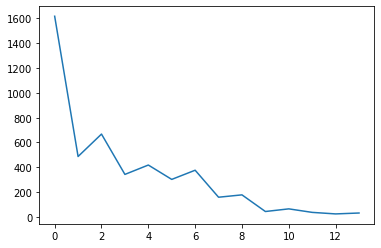

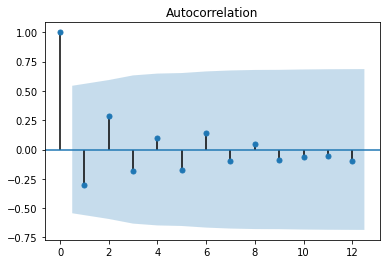

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


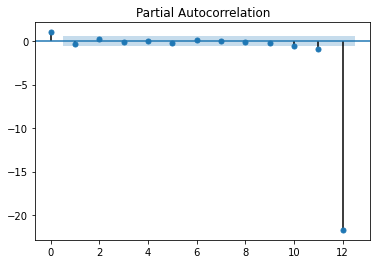

----------------------------------
1


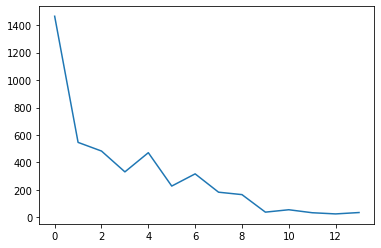

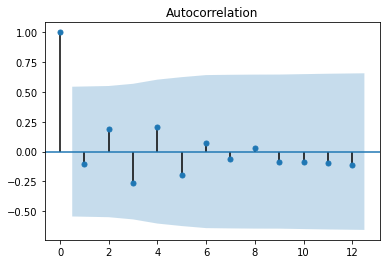

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


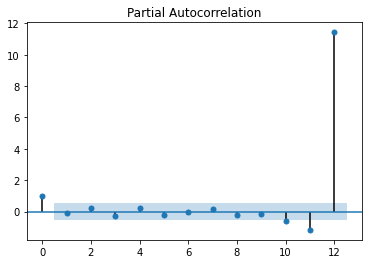

----------------------------------
2


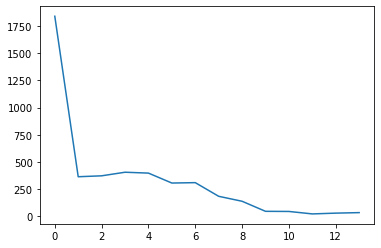

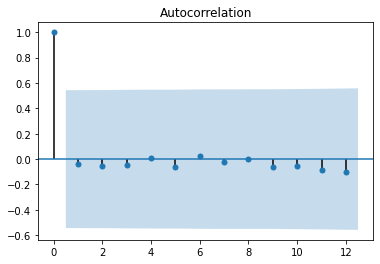

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


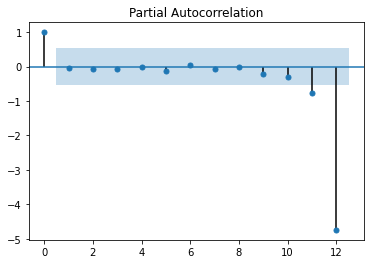

----------------------------------
3


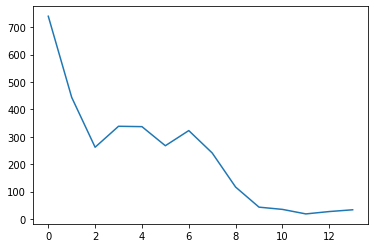

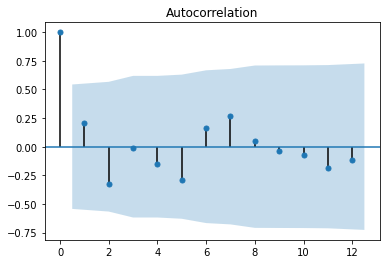

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


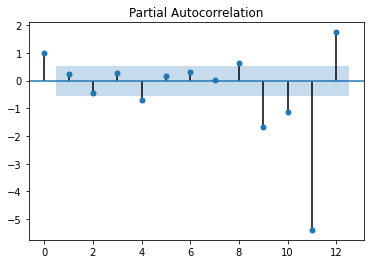

----------------------------------
4


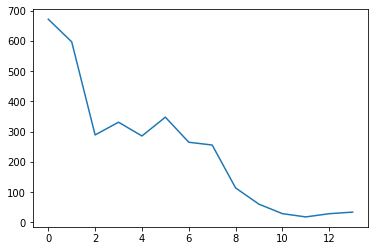

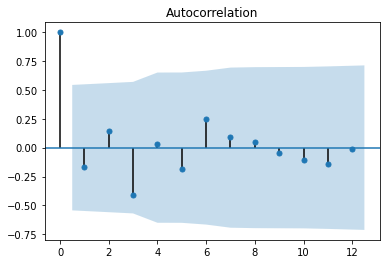

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


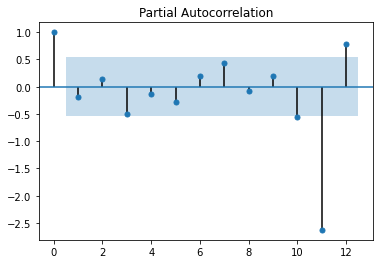

----------------------------------
5


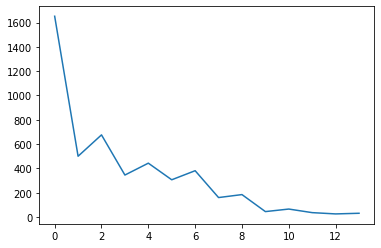

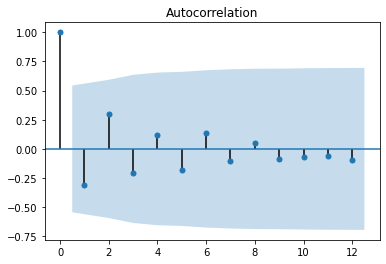

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


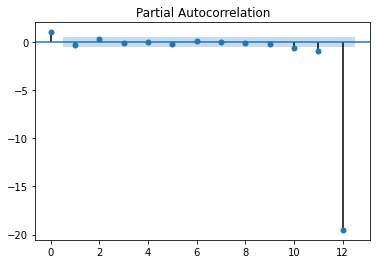

----------------------------------
6


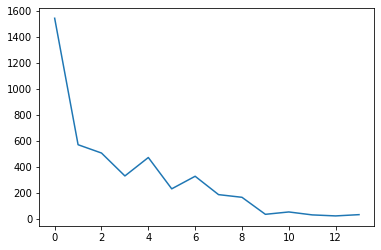

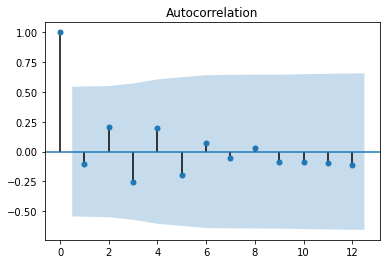

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


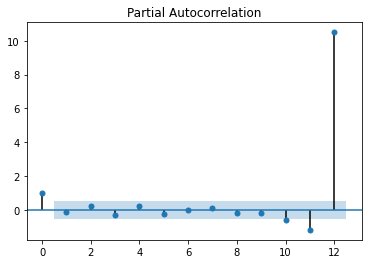

----------------------------------
7


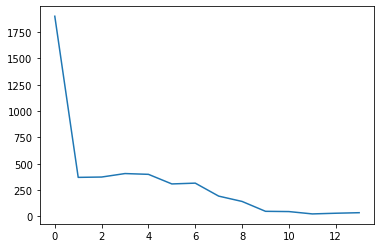

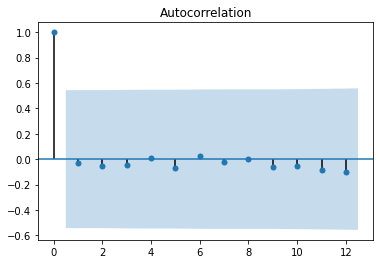

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


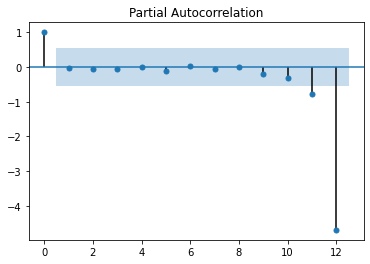

----------------------------------
8


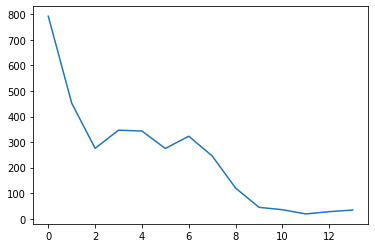

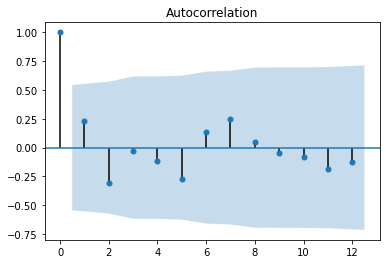

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


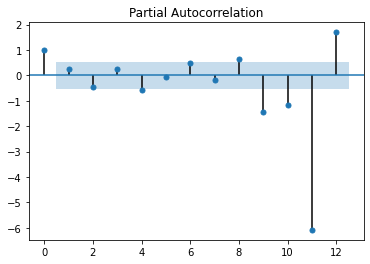

----------------------------------
9


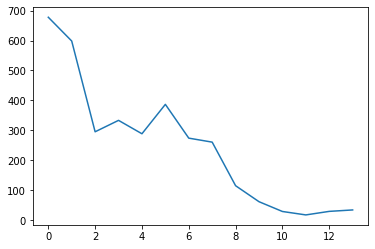

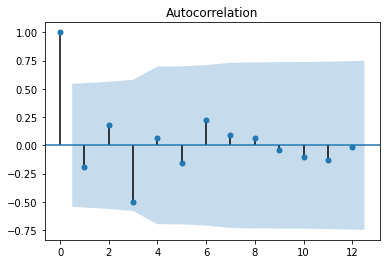

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


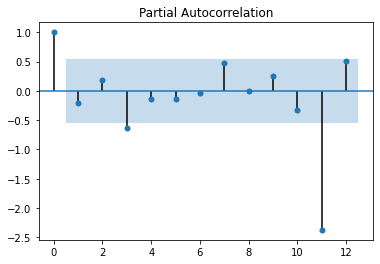

----------------------------------
10


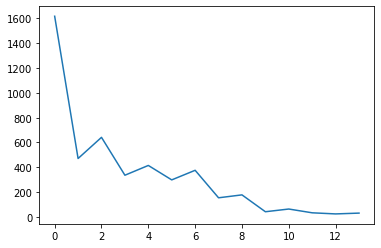

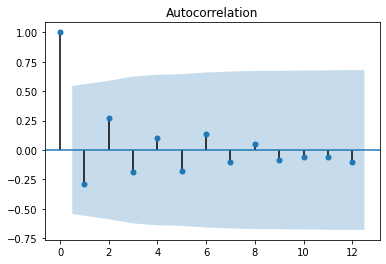

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


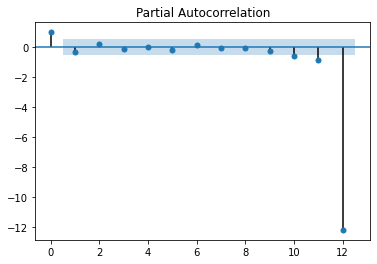

----------------------------------
11


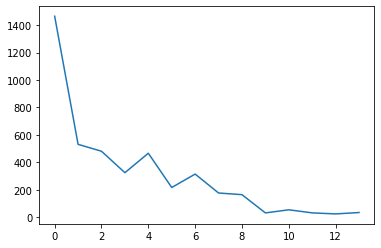

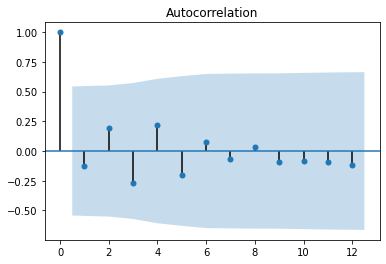

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


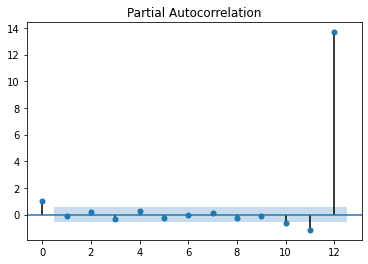

----------------------------------
12


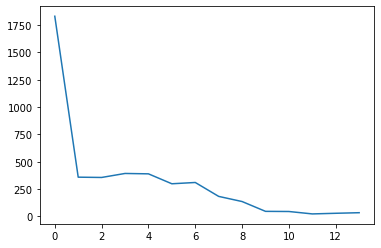

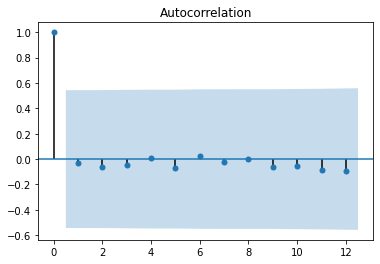

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


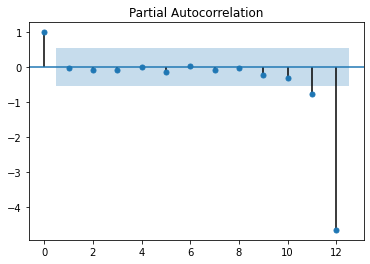

----------------------------------
13


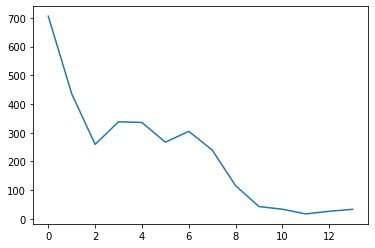

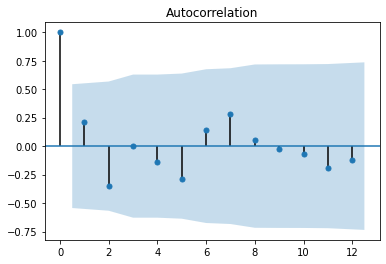

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


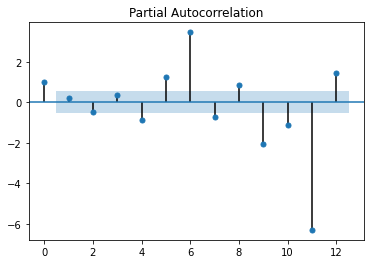

----------------------------------
14


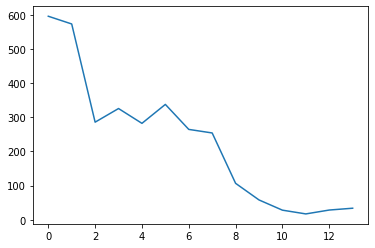

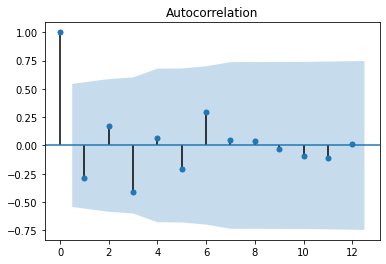

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


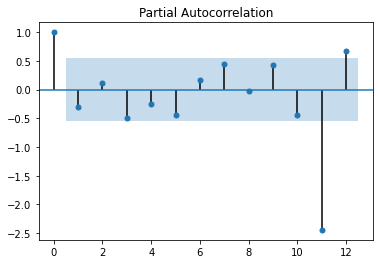

----------------------------------
15


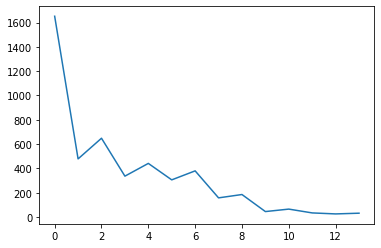

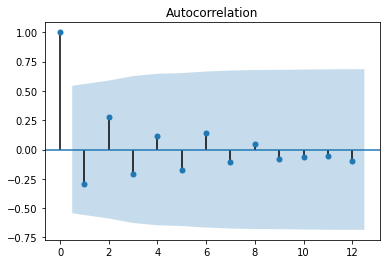

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


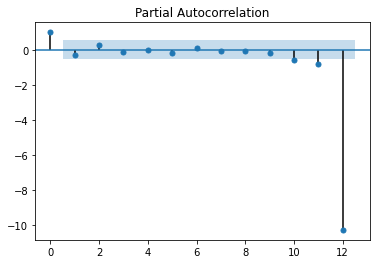

----------------------------------
16


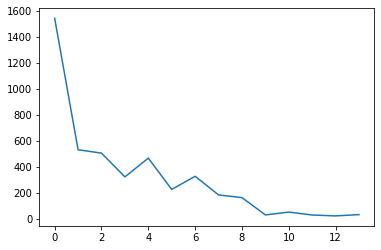

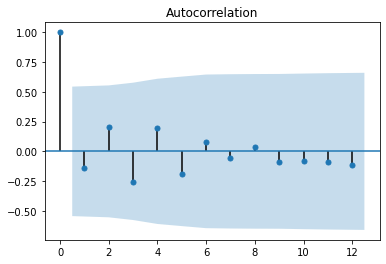

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


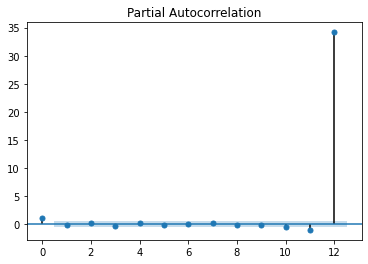

----------------------------------
17


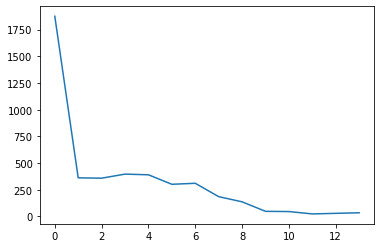

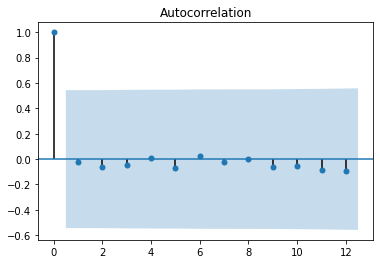

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


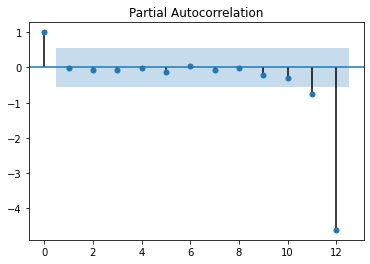

----------------------------------
18


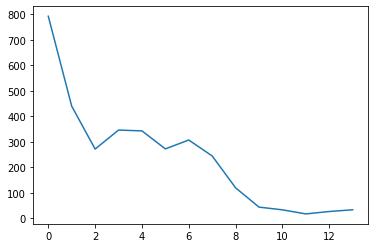

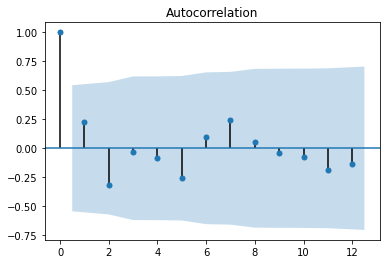

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


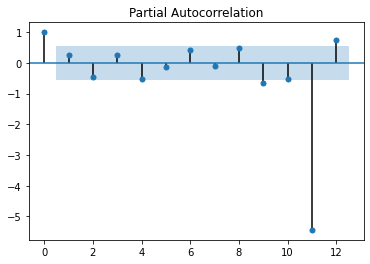

----------------------------------
19


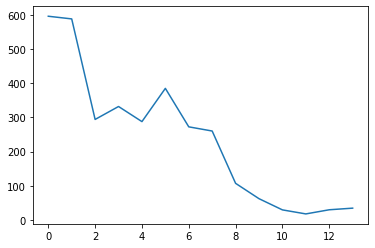

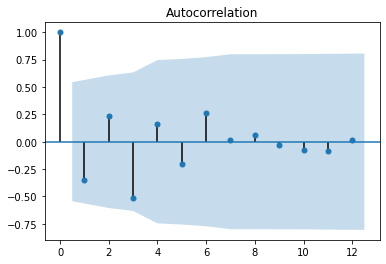

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


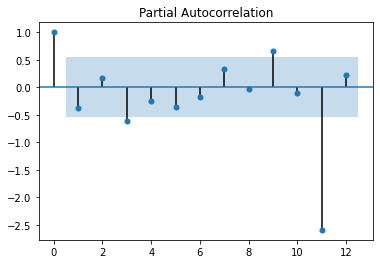

----------------------------------


In [0]:
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

for i in range(20):
  print(i)
  train_df[str(i)].plot()
  plt.show()
  plt.close()

  plot_acf(train_df[str(i)].diff()[1:]) # diff(): default 1-order difference ; [1:] cuz 1st value is NaN
  plt.show()
  plt.close()
  plot_pacf(train_df[str(i)].diff()[1:])
  plt.show()
  plt.close()
  print("----------------------------------")




In [0]:
import warnings
warnings.filterwarnings("ignore")

datasets=[train_df,dev_df,test_df]
orders=[]
for i in range(6):
  for j in range(6):
    orders.append((i,1,j))

print(orders)

models=[]
for i in range(20):
  print(i)
  for d in datasets:
    best=0
    aic=1000
    for j in range (16):
      try:
        model = ARIMA(d[str(i)],order=orders[j])
        model_fit = model.fit()
        if (model_fit.aic<aic):
          best=j
          aic=model_fit.aic
      except:
        pass
    model=ARIMA(d[str(i)],order=orders[best]).fit()
    models.append(model)
 








[(0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 1, 3), (0, 1, 4), (0, 1, 5), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 1, 3), (1, 1, 4), (1, 1, 5), (2, 1, 0), (2, 1, 1), (2, 1, 2), (2, 1, 3), (2, 1, 4), (2, 1, 5), (3, 1, 0), (3, 1, 1), (3, 1, 2), (3, 1, 3), (3, 1, 4), (3, 1, 5), (4, 1, 0), (4, 1, 1), (4, 1, 2), (4, 1, 3), (4, 1, 4), (4, 1, 5), (5, 1, 0), (5, 1, 1), (5, 1, 2), (5, 1, 3), (5, 1, 4), (5, 1, 5)]
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


"\nmodels=[]\nmodel = ARIMA(train_df['0'],order=(0,1,1)).fit()\nprint(train_df['0'].shape)\nmodels.append(model)\nmodel = ARIMA(train_df['1'],order=(0,1,1)).fit()\nmodels.append(model)\nmodel = ARIMA(train_df['2'],order=(0,1,0)).fit()\nmodels.append(model)\nmodel = ARIMA(train_df['3'],order=(0,1,0)).fit()\nmodels.append(model)\nmodel = ARIMA(train_df['4'],order=(0,1,0)).fit()\nmodels.append(model)\nmodel = ARIMA(train_df['5'],order=(0,1,1)).fit()\nmodels.append(model)\nmodel = ARIMA(train_df['6'],order=(0,1,1)).fit()\nmodels.append(model)\nmodel = ARIMA(train_df['7'],order=(0,1,0)).fit()\nmodels.append(model)\nmodel = ARIMA(train_df['8'],order=(0,1,0)).fit()\nmodels.append(model)\nmodel = ARIMA(train_df['9'],order=(0,1,0)).fit()\nmodels.append(model)\nmodel = ARIMA(train_df['10'],order=(0,1,1)).fit()\nmodels.append(model)\nmodel = ARIMA(train_df['11'],order=(0,1,1)).fit()\nmodels.append(model)\nmodel = ARIMA(train_df['12'],order=(0,1,0)).fit()\nmodels.append(model)\nmodel = ARIMA(train

0


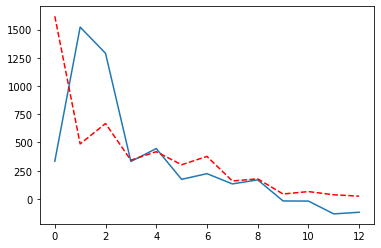

3


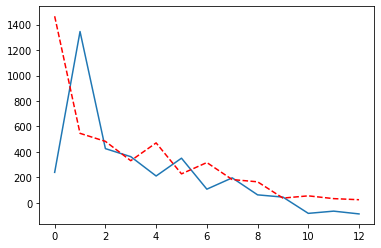

6


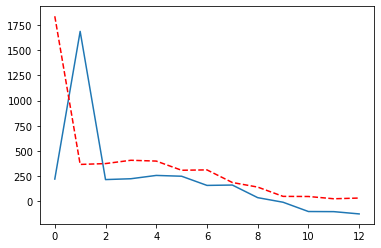

9


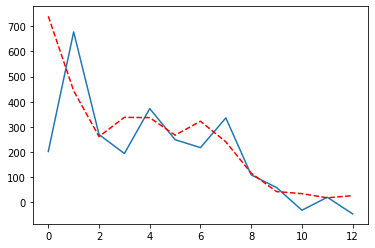

12


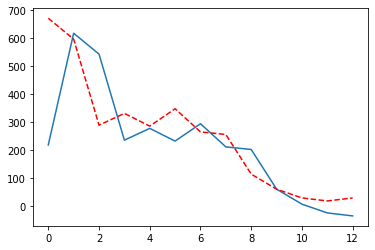

15


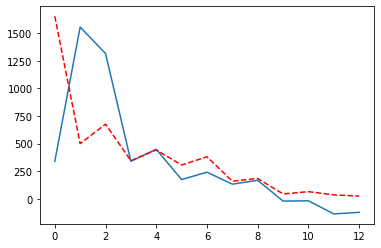

18


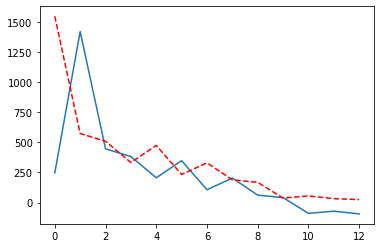

21


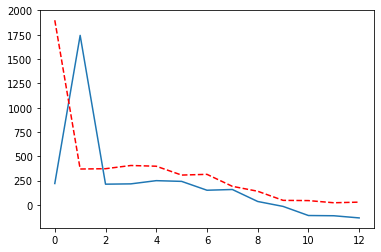

24


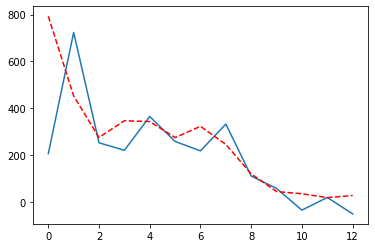

27


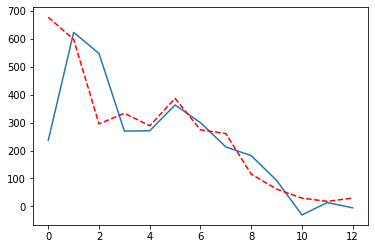

30


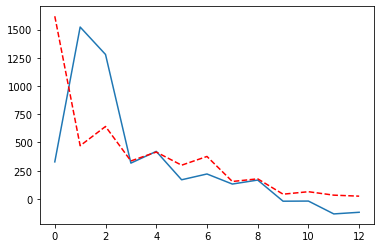

33


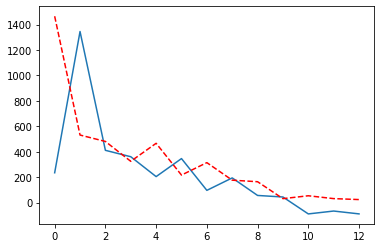

36


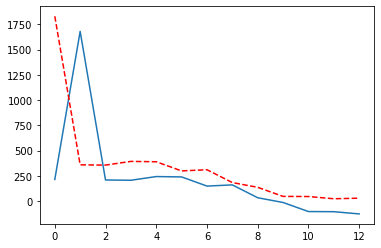

39


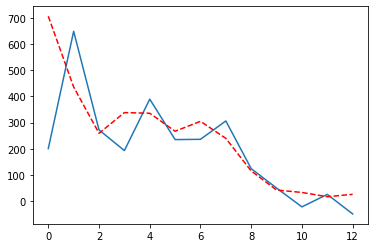

42


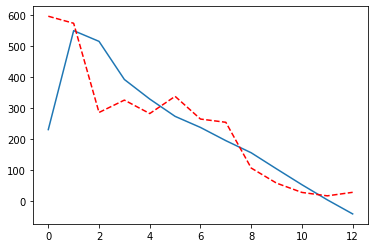

45


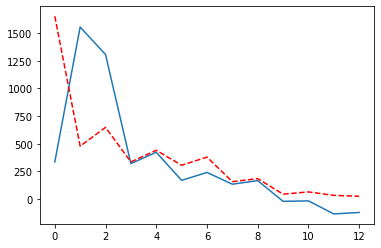

48


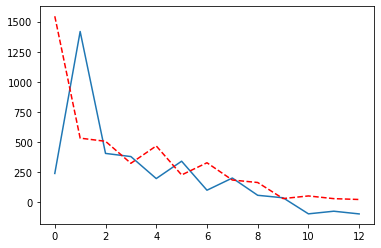

51


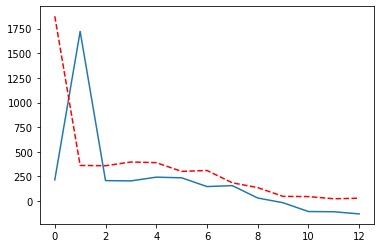

54


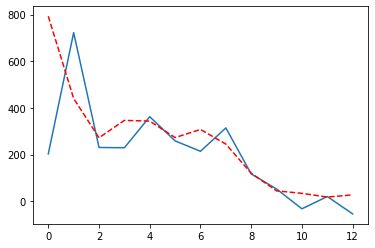

57


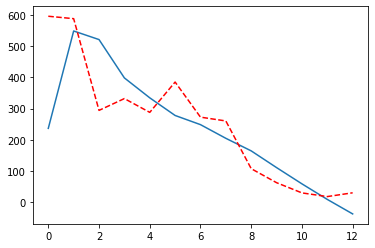

1


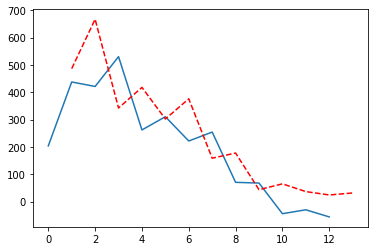

4


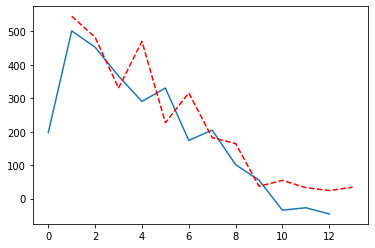

7


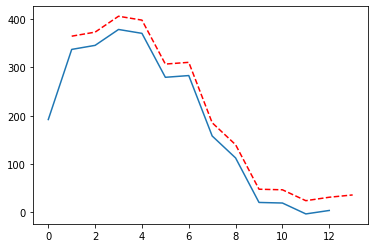

10


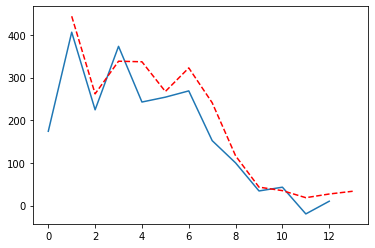

13


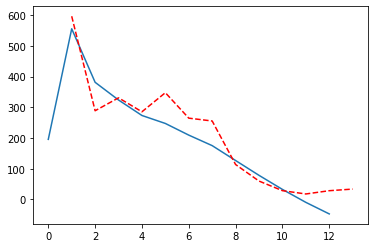

16


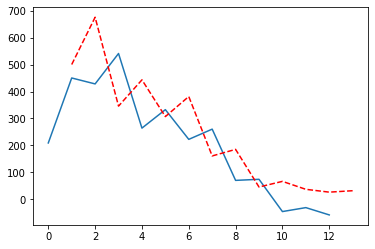

19


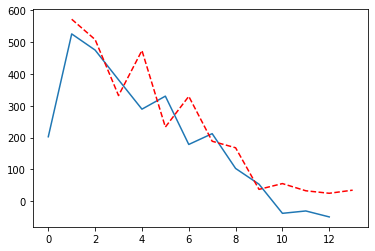

22


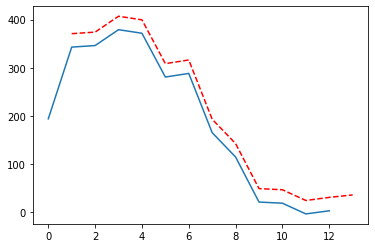

25


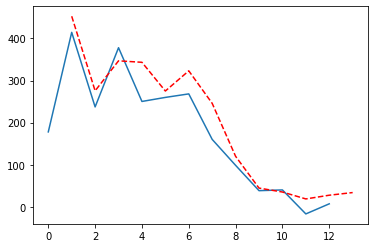

28


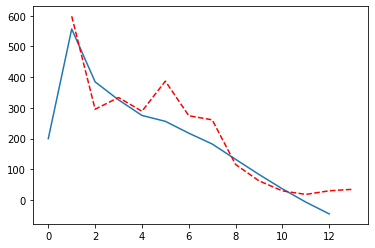

31


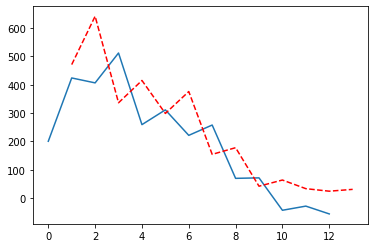

34


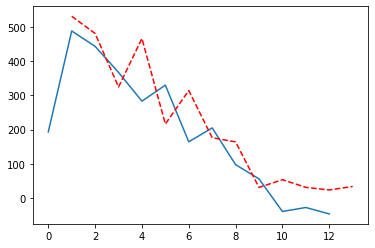

37


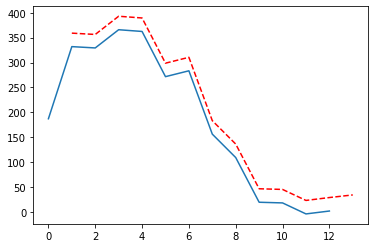

40


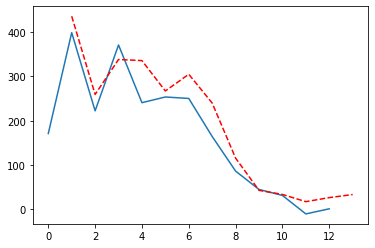

43


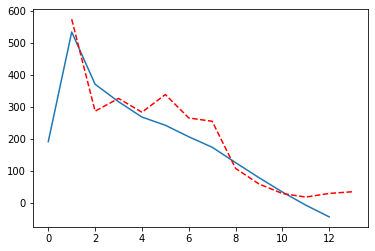

46


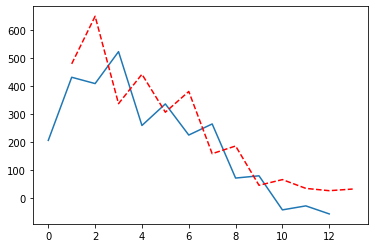

49


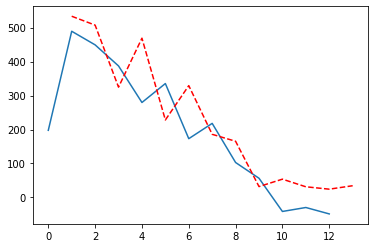

52


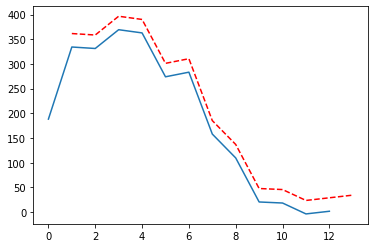

55


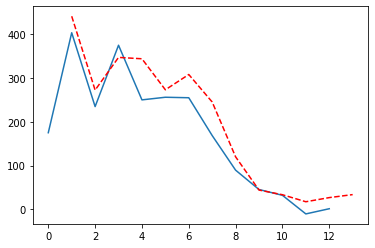

58


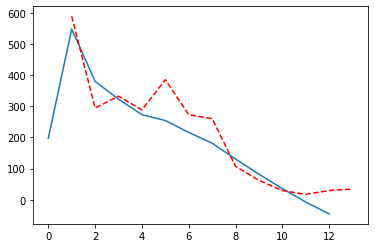

2


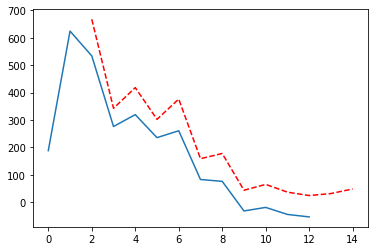

5


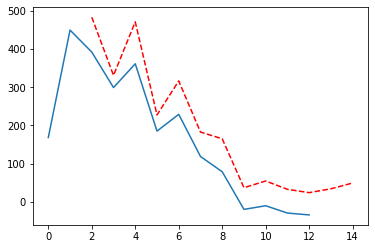

8


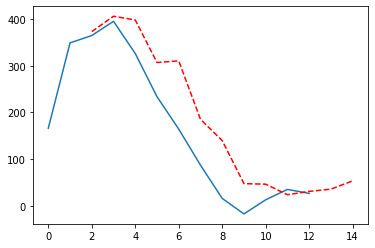

11


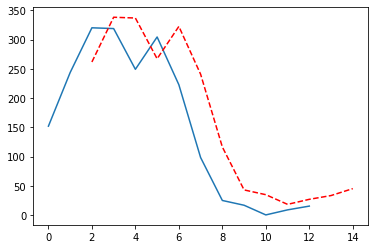

14


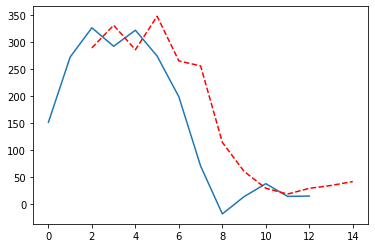

17


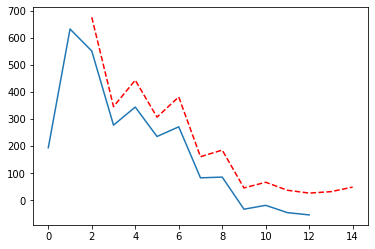

20


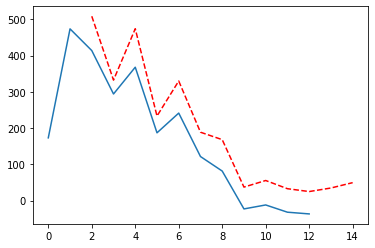

23


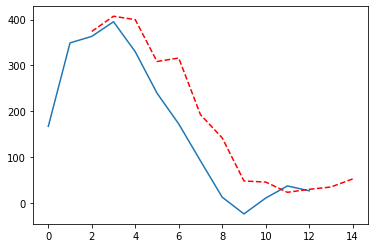

26


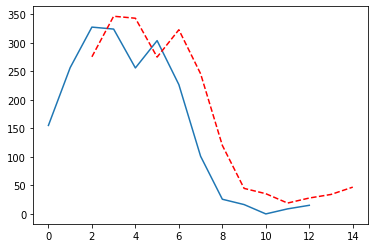

29


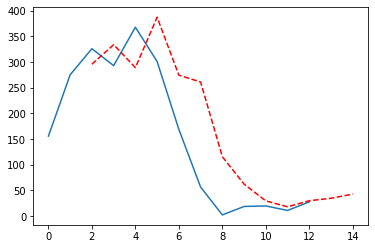

32


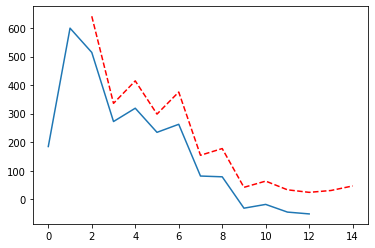

35


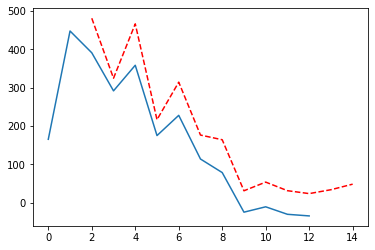

38


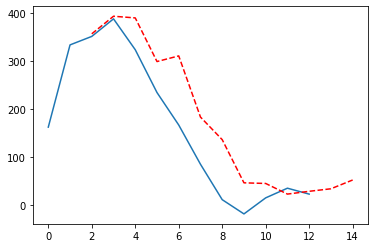

41


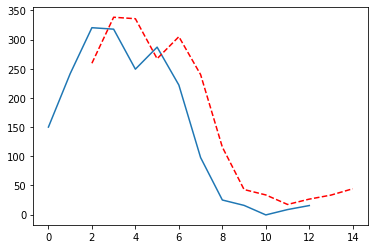

44


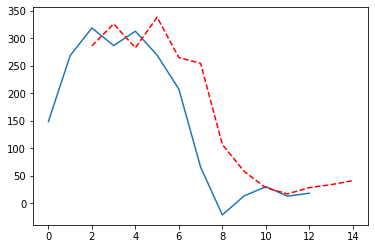

47


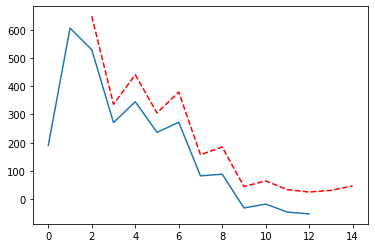

50


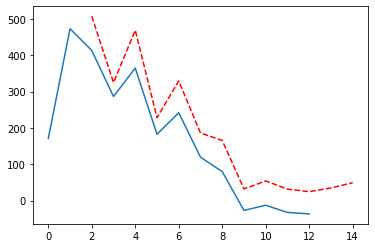

53


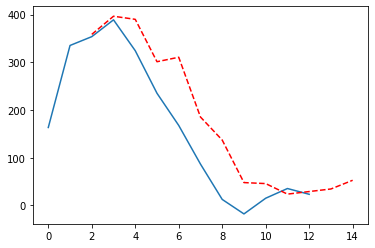

56


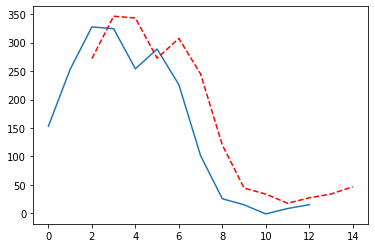

59


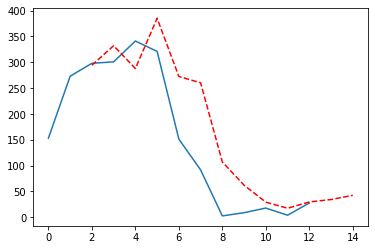

             0            1           2   ...         9           10          11
0   1284.828913 -1035.021037 -622.049937  ...  61.597343   84.095147  169.488166
1   1226.599167  -799.830000   57.050000  ...  -7.670000  137.610000   98.330000
2   1619.545417 -1323.304583  159.095417  ...  58.305417  149.515417  128.075417
3    537.475749  -233.858213   -8.131073  ... -16.013526   65.932307   -2.205589
4    453.037083   -21.141250 -254.141250  ...  -0.301250   22.298750   42.798750
5   1311.005787 -1053.086883 -639.005025  ...  64.412442   82.854410  171.769440
6   1298.638333  -845.978333   62.761667  ...  -4.198333  144.861667  104.061667
7   1677.866250 -1373.084583  158.995417  ...  62.145417  153.355417  133.495417
8    586.685149  -271.031615   22.847827  ... -13.230850   69.911731   -0.606144
9    440.900454   -25.302057 -252.432502  ... -31.237321   59.978402    4.245949
10  1290.101993 -1051.516399 -637.937923  ...  62.213539   82.857660  166.210272
11  1231.143750  -814.198750

In [0]:
train_X = []
train_Y = []
dev_X=[]
dev_Y=[]
test_X=[]
test_Y=[]
#from pyramid.arima import ARIMA
for i in range(0,60,3):
  print(i)
 
  predictions = list(models[i].predict(start=1,typ='levels',dynamic=False)) # levels: predict original｜linear: predict differenced
  predictions = [np.mean(predictions)] +predictions # pad the first time step with prediction mean
  plt.plot(predictions)
  plt.plot(train_df[str(i//3)],color='red',linestyle='--')
  plt.show()
  plt.close()
  
  residual=pd.Series(np.array(train_df[str(i//3)])-np.array(predictions))
  train_X.append(residual[:12])
  train_Y.append(residual[12])

for i in range(1,60,3):
  print(i)
  predictions = list(models[i].predict(start=1,typ='levels',dynamic=False)) 
  predictions = [np.mean(predictions)] +predictions 
  plt.plot(predictions)
  plt.plot(dev_df[str(i//3)],color='red',linestyle='--')
  plt.show()
  plt.close()

  residual=pd.Series(np.array(dev_df[str(i//3)])-np.array(predictions))
  residual = residual.transpose()
  dev_X.append(residual[:12])
  dev_Y.append(residual[12])  

for i in range(2,60,3):
  print(i)
  predictions = list(models[i].predict(start=1,typ='levels',dynamic=False)) 
  predictions = [np.mean(predictions)] +predictions 
  plt.plot(predictions)
  plt.plot(test_df[str(i//3)],color='red',linestyle='--')
  plt.show()
  plt.close()

  residual=pd.Series(np.array(test_df[str(i//3)])-np.array(predictions))
  residual = residual.transpose()
  test_X.append(residual[:12])
  test_Y.append(residual[12]) 


train_X = pd.concat(train_X,axis=1).transpose()
train_Y = pd.DataFrame(train_Y)
print(train_X)
print(train_Y)

dev_X = pd.concat(dev_X,axis=1).transpose()
dev_Y = pd.DataFrame(dev_Y)
print(dev_X)
print(dev_Y)

test_X = pd.concat(test_X,axis=1).transpose()
test_Y = pd.DataFrame(test_Y)
print(test_X)
print(test_Y)



#LSTM Model



In [0]:

from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Activation
from keras import backend as K
from keras.utils.generic_utils import get_custom_objects
from keras.callbacks import ModelCheckpoint
from keras.regularizers import l1_l2



from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [0]:
# data sampling
STEP = 20


_train_X = np.asarray(train_X).reshape(20, 12, 1)
_dev_X = np.asarray(dev_X).reshape((20, 12, 1))
_test_X = np.asarray(test_X).reshape(20, 12, 1)

_train_Y = np.asarray(train_Y).reshape(20, 1)
_dev_Y = np.asarray(dev_Y).reshape(20, 1)
_test_Y = np.asarray(test_Y).reshape(20, 1)


In [0]:
#define custom activation
class Double_Tanh(Activation):
    def __init__(self, activation, **kwargs):
        super(Double_Tanh, self).__init__(activation, **kwargs)
        self.__name__ = 'double_tanh'

def double_tanh(x):
    return (K.tanh(x) * 2)

get_custom_objects().update({'double_tanh':Double_Tanh(double_tanh)})

In [0]:
print (_train_X)
print (_train_Y)

[[[ 1.28482891e+03]
  [-1.03502104e+03]
  [-6.22049937e+02]
  [ 1.11609797e+01]
  [-2.75446978e+01]
  [ 1.29112101e+02]
  [ 1.52728305e+02]
  [ 2.59373423e+01]
  [ 9.27421304e+00]
  [ 6.15973426e+01]
  [ 8.40951466e+01]
  [ 1.69488166e+02]]

 [[ 1.22659917e+03]
  [-7.99830000e+02]
  [ 5.70500000e+01]
  [-3.17900000e+01]
  [ 2.59950000e+02]
  [-1.23170000e+02]
  [ 2.09090000e+02]
  [-1.35600000e+01]
  [ 1.02500000e+02]
  [-7.67000000e+00]
  [ 1.37610000e+02]
  [ 9.83300000e+01]]

 [[ 1.61954542e+03]
  [-1.32330458e+03]
  [ 1.59095417e+02]
  [ 1.83675417e+02]
  [ 1.42655417e+02]
  [ 5.94554167e+01]
  [ 1.54295417e+02]
  [ 2.52654167e+01]
  [ 1.05115417e+02]
  [ 5.83054167e+01]
  [ 1.49515417e+02]
  [ 1.28075417e+02]]

 [[ 5.37475749e+02]
  [-2.33858213e+02]
  [-8.13107300e+00]
  [ 1.43929627e+02]
  [-3.58860897e+01]
  [ 1.79268361e+01]
  [ 1.04884428e+02]
  [-9.49723156e+01]
  [ 6.89152970e+00]
  [-1.60135265e+01]
  [ 6.59323066e+01]
  [-2.20558858e+00]]

 [[ 4.38874189e+02]
  [-2.308049

In [0]:
model = Sequential()
#check https://machinelearningmastery.com/use-weight-regularization-lstm-networks-time-series-forecasting/
model.add(LSTM(33, input_shape=(12,1), dropout=0.0, kernel_regularizer=l1_l2(0.00,0.00), bias_regularizer=l1_l2(0.00,0.00)))
model.add(Dense(1))
model.add(Activation(double_tanh))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse', 'mae'])

print(model.metrics_names)


['loss', 'mse', 'mae']


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
print(_train_X.shape)
print(_train_Y.shape)


(20, 12, 1)
(20, 1)


In [0]:
model_scores = {}
Reg = False
d = 'hybrid_LSTM'

if Reg :
    d += '_with_reg'

epoch_num=1
for _ in range(100):

    dir = 'gdrive/My Drive/AI Project/models/'+d
    file_list = os.listdir(dir)
    print(file_list)
    if len(file_list) != 0 :
        epoch_num = len(file_list) + 1
        recent_model_name = '/epoch'+str(epoch_num-1)+'.h5'
        filepath = dir + recent_model_name
        model = load_model(filepath)

    filepath = dir + '/epoch'+str(epoch_num)+'.h5'

    checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=False, mode='min')
    callbacks_list = [checkpoint]
    if len(callbacks_list) == 0:
        model.fit(_train_X, _train_Y, epochs=1, batch_size=1, shuffle=True)
    else:
        model.fit(_train_X, _train_Y, epochs=1, batch_size=1, shuffle=True, callbacks=callbacks_list)
    
    score_train = model.evaluate(_train_X, _train_Y)
    score_dev = model.evaluate(_dev_X, _dev_Y)
    score_test = model.evaluate(_test_X, _test_Y)
    
    print('train set score : mse - ' + str(score_train[1]) +' / mae - ' + str(score_train[2]))
    print('dev set score : mse - ' + str(score_dev[1]) +' / mae - ' + str(score_dev[2]))
    print('test set score : mse - ' + str(score_test[1]) +' / mae - ' + str(score_test[2]))

    # get former score data
    df = pd.read_csv(dir+".csv")
    train_mse = list(df['TRAIN_MSE'])
    dev_mse = list(df['DEV_MSE'])
    test_mse = list(df['TEST_MSE'])

    train_mae = list(df['TRAIN_MAE'])
    dev_mae = list(df['DEV_MAE'])
    test_mae = list(df['TEST_MAE'])

    # append new data
    train_mse.append(score_train[1])
    dev_mse.append(score_dev[1])
    test_mse.append(score_test[1])

    train_mae.append(score_train[2])
    dev_mae.append(score_dev[2])
    test_mae.append(score_test[2])

    # organize newly created score dataset
    model_scores['TRAIN_MSE'] = train_mse
    model_scores['DEV_MSE'] = dev_mse
    model_scores['TEST_MSE'] = test_mse

    model_scores['TRAIN_MAE'] = train_mae
    model_scores['DEV_MAE'] = dev_mae
    model_scores['TEST_MAE'] = test_mae

    model_scores_df = pd.DataFrame(model_scores)
    model_scores_df.to_csv(dir+".csv")


[]
Epoch 1/1
20/20 [==============================] - 1s 38ms/step - loss: 13795.6959 - mse: 13795.6953 - mae: 110.8245

Epoch 00001: saving model to gdrive/My Drive/AI Project/models/hybrid_LSTM/epoch1.h5
20/20 [==============================] - 0s 151us/step
train set score : mse - 13725.2451171875 / mae - 110.47572326660156
dev set score : mse - 4512.09912109375 / mae - 61.90349197387695
test set score : mse - 3846.09423828125 / mae - 52.34465408325195
['epoch1.h5']
Epoch 1/1
20/20 [==============================] - 1s 38ms/step - loss: 13667.6421 - mse: 13667.6436 - mae: 110.2049

Epoch 00001: saving model to gdrive/My Drive/AI Project/models/hybrid_LSTM/epoch2.h5
20/20 [==============================] - 0s 134us/step
train set score : mse - 13599.1845703125 / mae - 109.89876556396484
dev set score : mse - 4420.4248046875 / mae - 61.1544075012207
test set score : mse - 3774.737548828125 / mae - 51.65234375
['epoch1.h5', 'epoch2.h5']
Epoch 1/1
20/20 [==============================] 

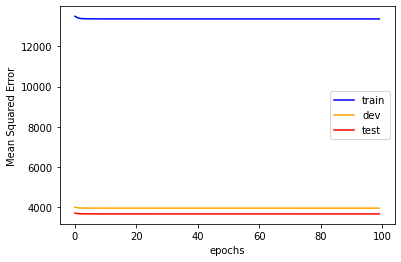

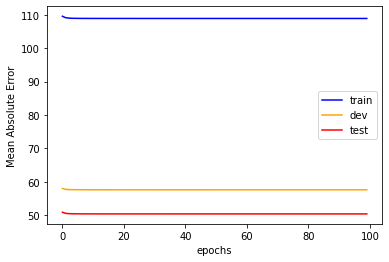

In [0]:
performance = pd.read_csv(dir+'.csv')

mse=['TRAIN_MSE','DEV_MSE','TEST_MSE']
mae = ['TRAIN_MAE','DEV_MAE','TEST_MAE']

plt.plot(performance[mse[0]][:100],color='blue',label='train')
plt.plot(performance[mse[1]][:100],color='orange',label='dev')
plt.plot(performance[mse[2]][:100],color='red',label='test')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('Mean Squared Error')
plt.show()
plt.close()

plt.plot(performance[mae[0]][:100],color='blue',label='train')
plt.plot(performance[mae[1]][:100],color='orange',label='dev')
plt.plot(performance[mae[2]][:100],color='red',label='test')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('Mean Absolute Error')
plt.show()
plt.close()

[1.9997895]
[ 479.60679377 -281.9622398  -115.92975436   26.28927185   56.79975133
  -76.82928402  -82.98599167  -39.18667488  -11.1715765    68.61948301
   43.25876918   76.22399465]
[102.17077645]
[479.606793769569, -281.96223980460155, -115.92975435544895, 26.289271851348587, 56.799751326986666, -76.82928402249132, -82.98599166941025, -39.186674879805445, -11.171576495089639, 68.61948300706877, 43.258769175393816, 76.22399465390977, 102.17077644696707]


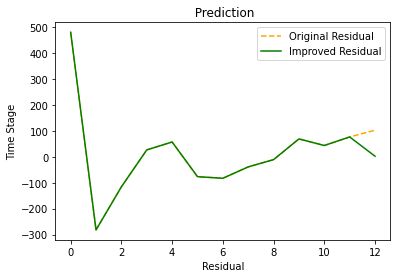

In [0]:
model = load_model(dir+'/epoch100.h5')



predictions = model.predict(_test_X)
print(predictions[0,0:].ravel())
print(_test_X[0,0:].ravel())
print(_test_Y[0,0:].ravel())
graph=list(_test_X[0,0:].ravel())+list(_test_Y[0,0:].ravel())
print(graph)
graph_improve=list(_test_X[0,0:].ravel())+list(predictions[0,0:].ravel())

plt.plot(graph, color = 'Orange', label = 'Original Residual',linestyle='--')
plt.plot(graph_improve, color = 'green', label = 'Improved Residual')
plt.title(' Prediction')
plt.xlabel('Residual')
plt.ylabel('Time Stage')
plt.legend()
plt.show()
